   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Mean Squared Error (MSE): 2378317289.567475
R-squared: 0.8260851299316047


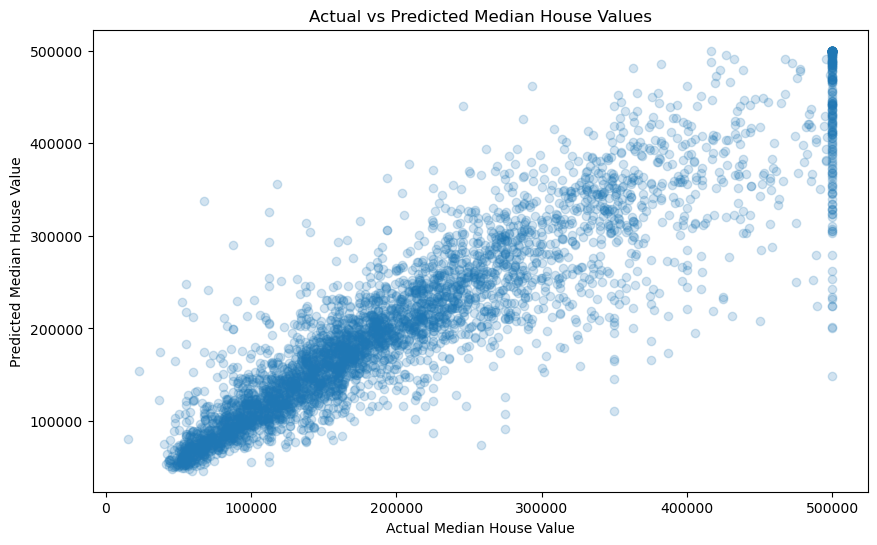

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = pd.read_csv('housing.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Data Preparation: Dropping any rows with missing values (if any)
data.dropna(inplace=True)

# Converting categorical data into numerical data using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Separating the features (X) and the target variable (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Constructing the Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the regressor on the training set
regressor.fit(X_train, y_train)

# Predicting the target variable on the testing set
y_pred = regressor.predict(X_test)

# Evaluating the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.show()


Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
ROC AUC: 0.9952505732066819


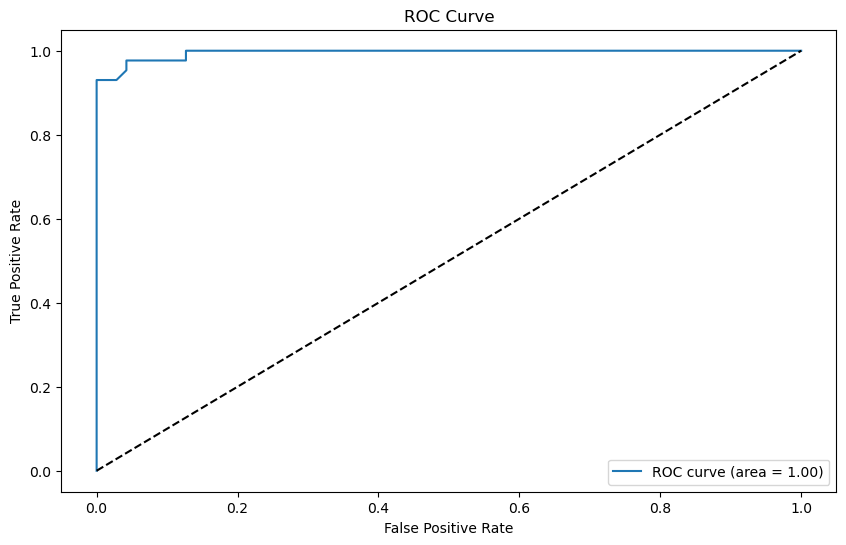

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Dropping the ID column as it is not useful for prediction
data.drop('ID', axis=1, inplace=True)

# Encoding the target variable: Malignant (M) as 1 and Benign (B) as 0
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separating features and target variable
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Constructing the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training set
classifier.fit(X_train, y_train)

# Predicting the target variable on the testing set
y_pred = classifier.predict(X_test)

# Evaluating the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
